In [1]:
import pandas as pd
import numpy as np

members = {
    'RM': ['552226', '98676', '551905', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Edward de Lima Silva',
             'Gabriel Barroso de Assis França','Kayque Lima Nunes'],
}
group = pd.DataFrame(members)
group.set_index('RM', inplace=True)
group['Turma'] = '2TDSPW'
group

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,2TDSPW
98676,Edward de Lima Silva,2TDSPW
551905,Gabriel Barroso de Assis França,2TDSPW
550782,Kayque Lima Nunes,2TDSPW


# Heliophysics Events

This notebook contains a computer vision AI model, trained to classify fourth different heliophysics on the Sun's surface — Active Regions, Coronal Holes, Sigmoids and Solar Flares.


The dataset used to train this model is avaiable at https://universe.roboflow.com/blackout-lazqw/heliophysics-events. Most images, if not all, are from NASA's datasets and archives.


Since I'm no specialist at this subject, I counted with https://svs.gsfc.nasa.gov to search for images using keywords and addressing its class to it according to the picture's caption.


## Classes



• **Active Regions** are areas on the Sun's surface where magnetic fields are particularly strong and dynamic. They often appear as sunspots and are associated with heightened solar activity.


• **Solar Flares** are sudden, intense bursts of energy and radiation released from the Sun's surface. They occur when magnetic energy that has built up in the solar atmosphere is suddenly released.


• **Sigmoids** refer to S-shaped configurations of magnetic fields in the Sun's corona. They are often associated with solar eruptions such as flares and coronal mass ejections (CMEs).


• **Coronal Holes** are regions in the Sun's corona where the magnetic field lines extend far out into space, allowing solar wind to flow more freely. Coronal holes appear darker in images of the Sun because they are cooler and less dense than the surrounding areas.



# Setup

Preparing enviroment.

In [ ]:
import os
from IPython.display import display, Image

HOME = os.getcwd()

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="cnPWaJ5AyZuYlgiSI2wJ")
project = rf.workspace("blackout-lazqw").project("heliophysics-events")
version = project.version(4)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Heliophysics-Events-4 in yolov8:: 100%|██████████| 192/192 [00:00<00:00, 7790.90it/s]


# Training

Visualizing model.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=620 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Heliophysics-Events-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=620, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fa

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Heliophysics-Events-4/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 43. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.01it/s]
                   all         27         43      0.559      0.24

/content


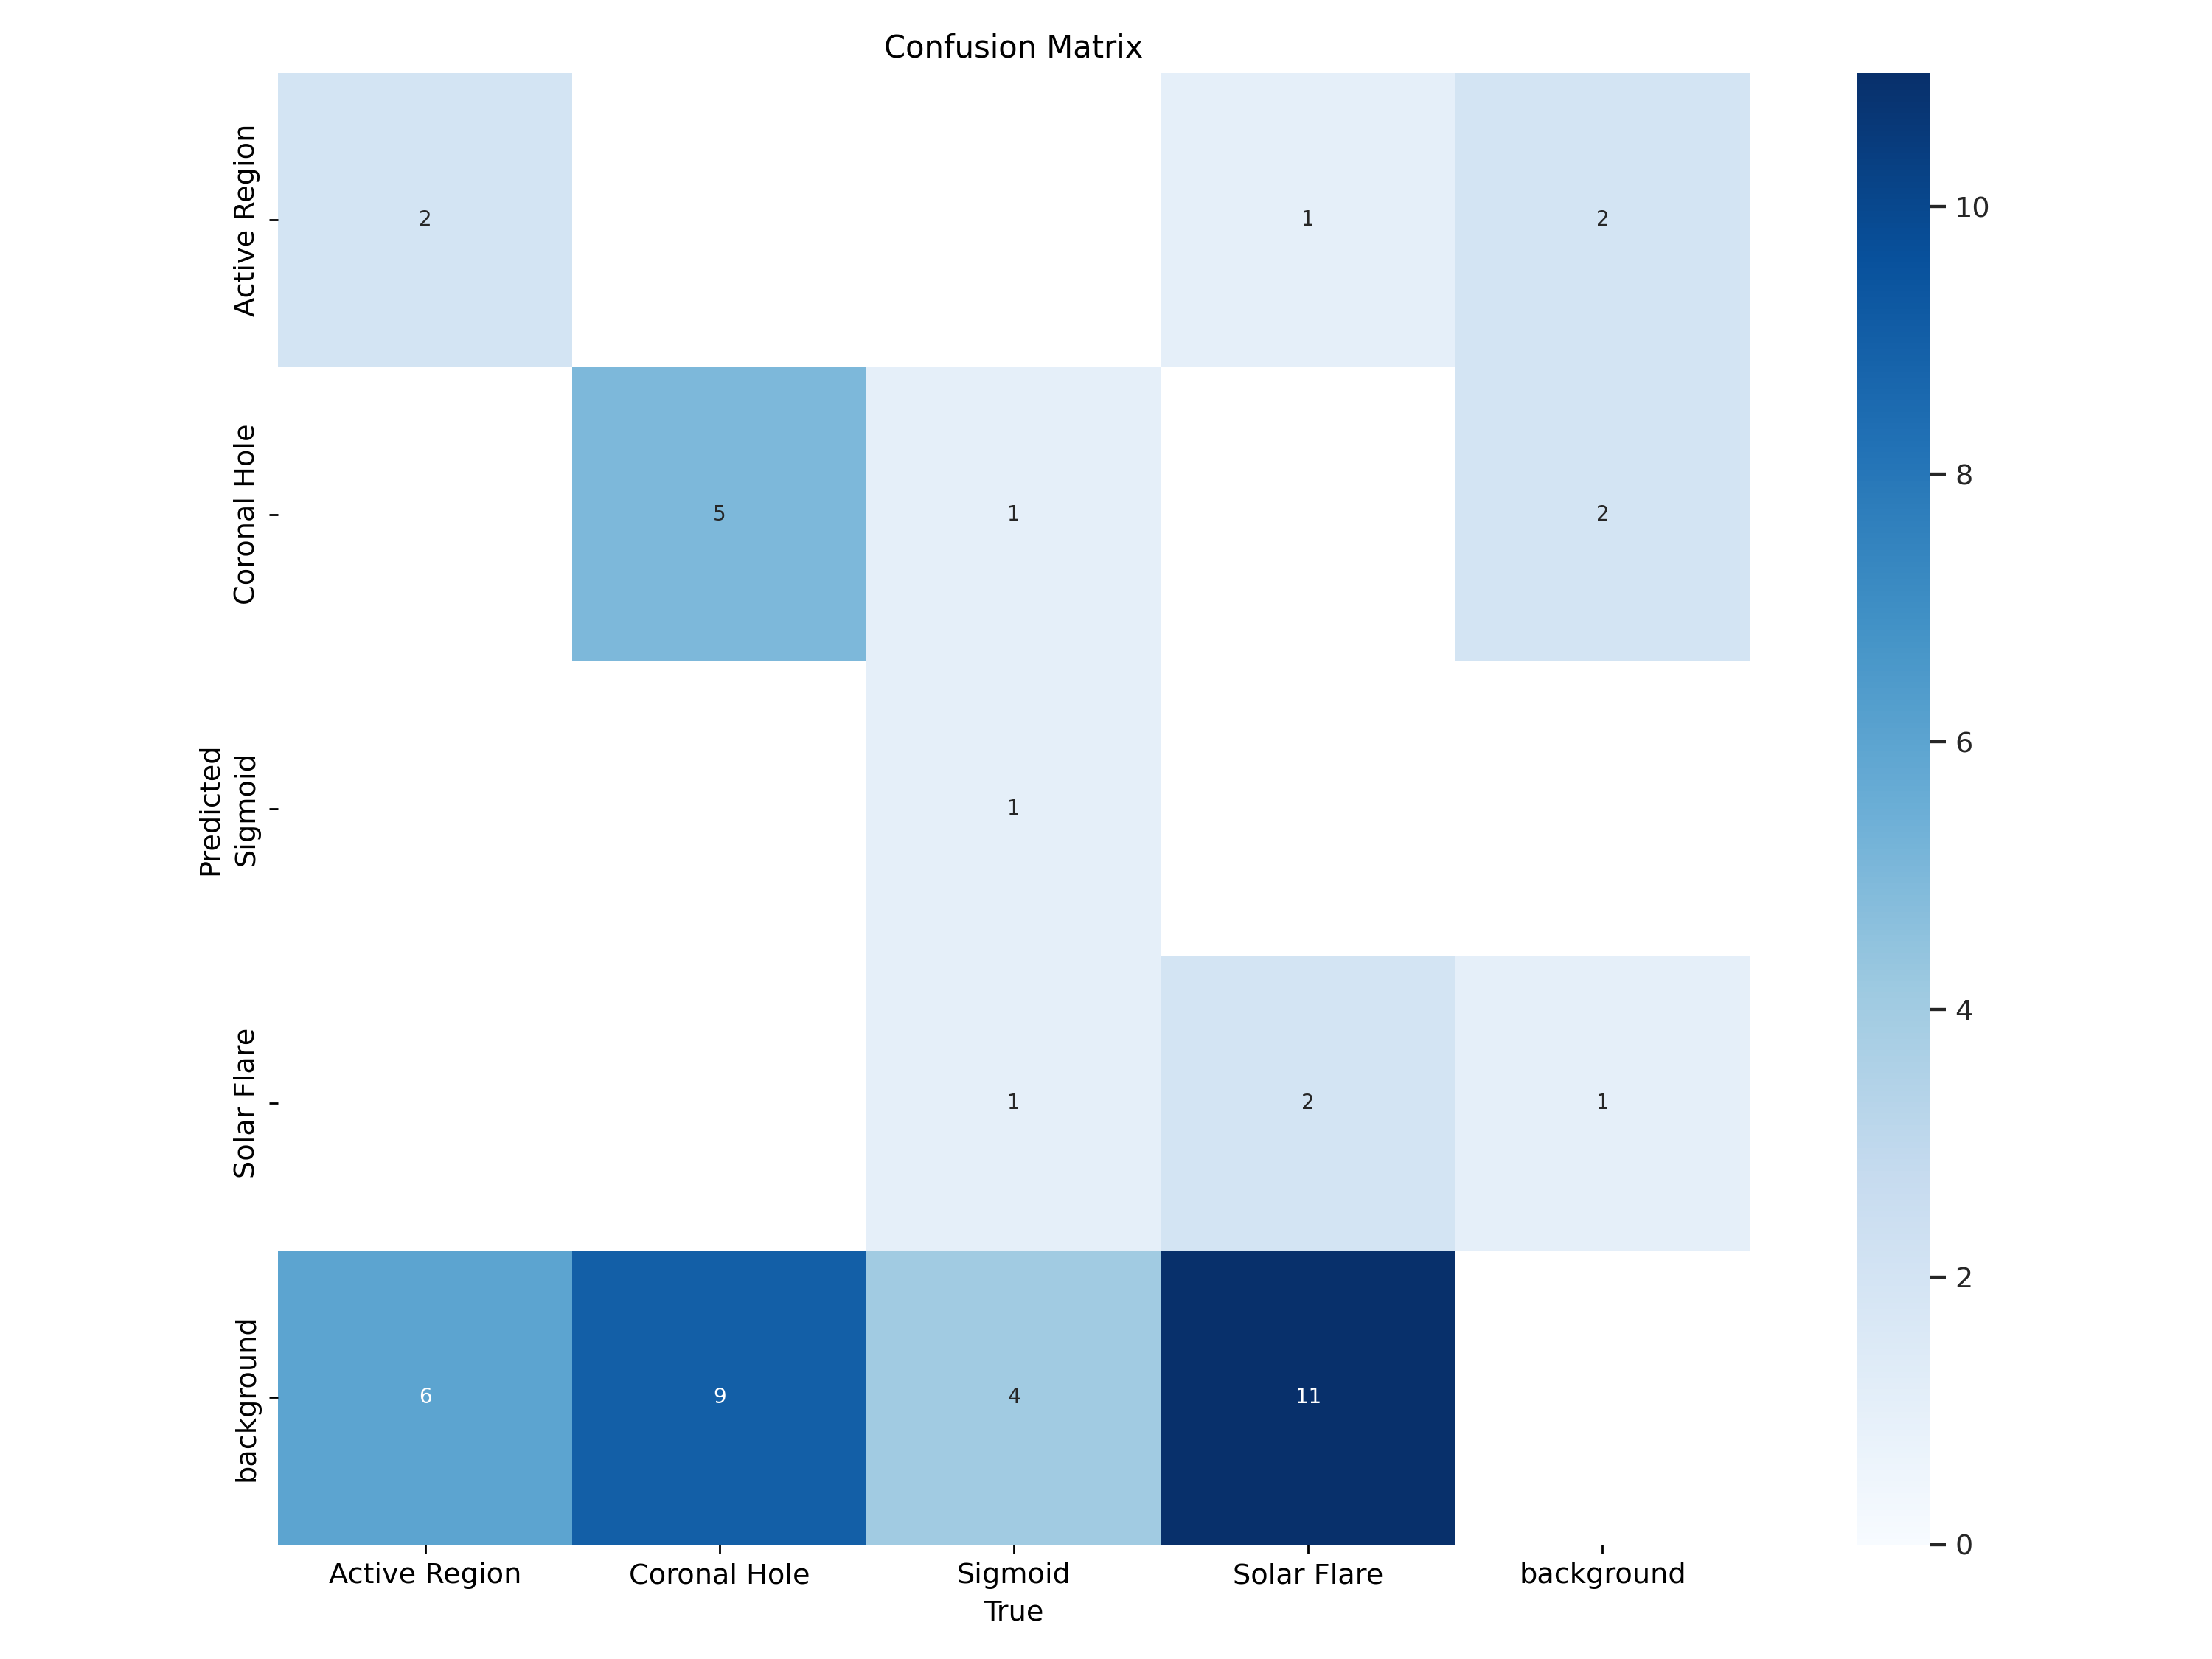

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:

      print("\n")

/content


/content


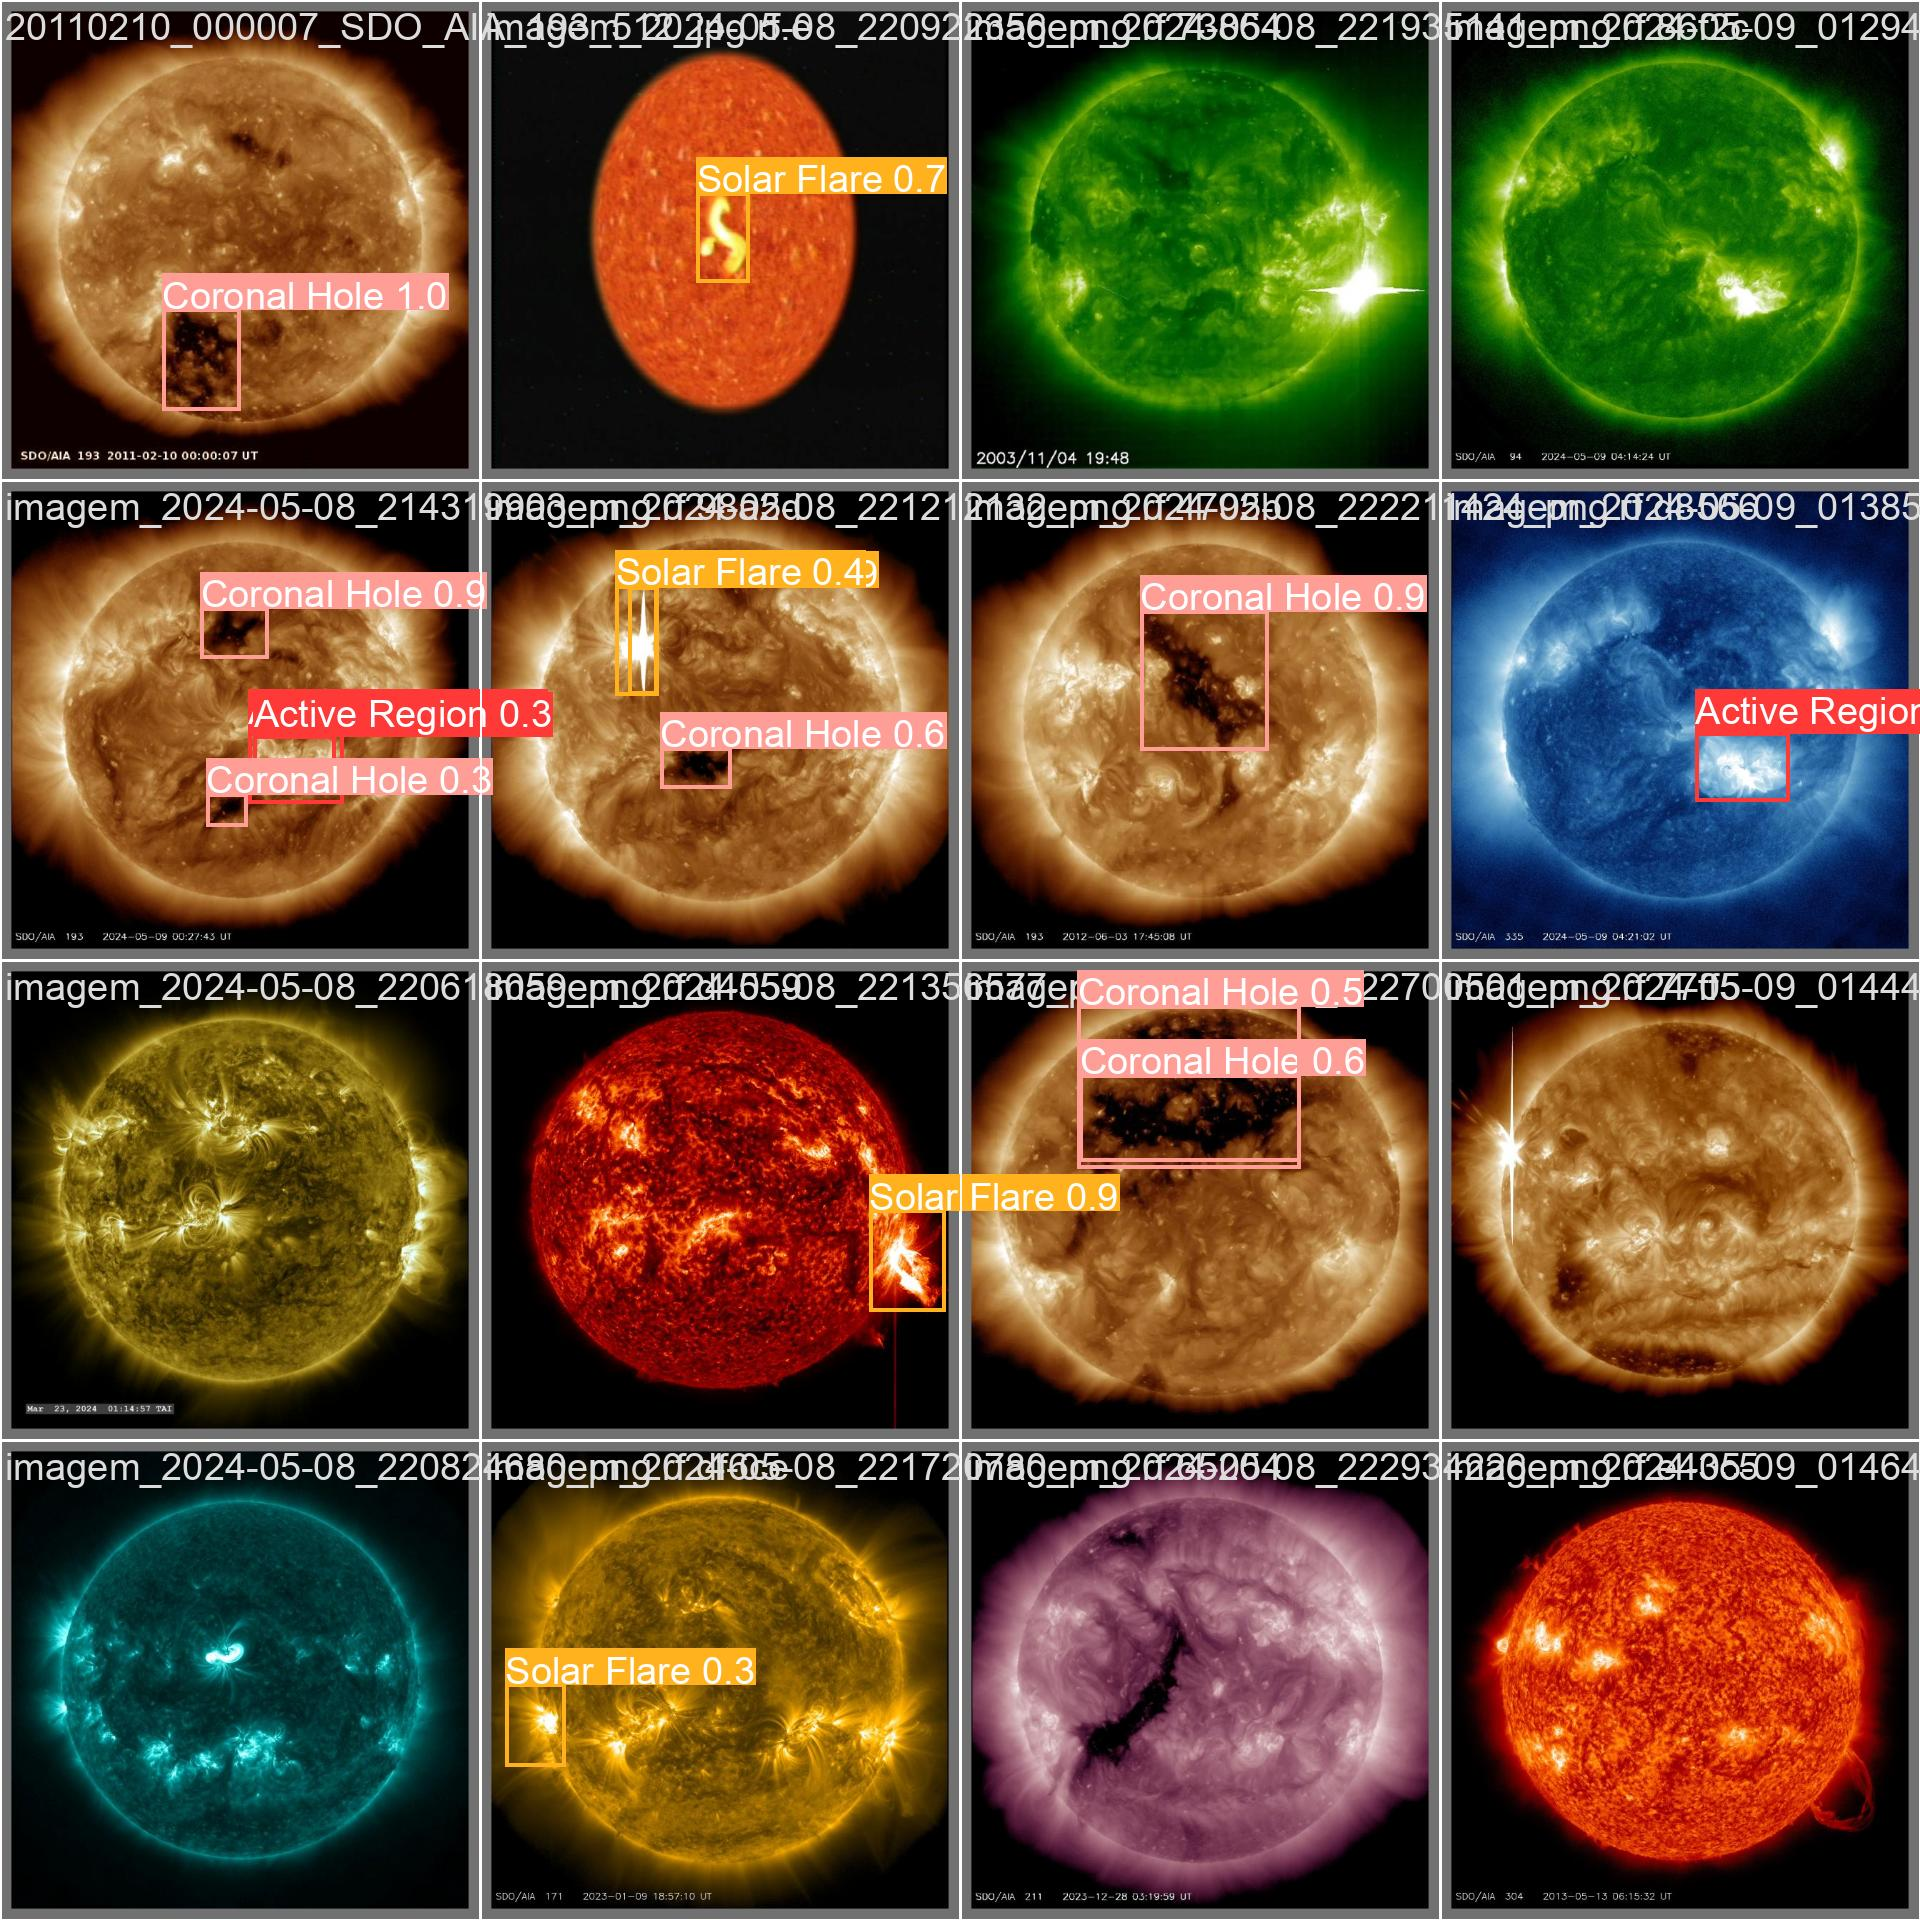

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_pred.jpg', width=620)